![UCA](http://univ-cotedazur.fr/fr/university/communication-presse/charte-et-logos/logo/png/uca-logo-ligne)
# **DEEP LEARNING SCHOOL - LAB SESSION**

## **Object Detection Using Deep learning**


#### Lab proposed by:


---




### Frederic PRECIOSO
Inria - Laboratoire I3S - Full Professor at Universite Cote d'Azur

frederic.precioso@unice.fr / 
[linkedin](https://www.linkedin.com/in/frédéric-precioso-3a37389) /
[web page](http://www.i3s.unice.fr/~precioso)

### Melissa SANABRIA
Inria - Laboratoire I3S - Universite Cote d'Azur / Wildmoka

sanabria@i3s.unice.fr / 
[linkedin](http://linkedin.com/in/msanabriar/) /
[web page](http://www.i3s.unice.fr/~sanabria/)


### Alan FERBACH 
Videtics / Universite Cote d'Azur

alan.ferbach@videtics.com / 
[linkedin](https://www.linkedin.com/in/alan-ferbach/)


### Pierre-Alexis LE BORGNE
Videtics / Universite Cote d'Azur

pierre.alexis.le.borgne@videtics.com /
[linkedin](https://www.linkedin.com/in/pierre-alexis-le-borgne-279894121/)


---

#Requirements

All the lines of code in this lab will assume you can read and write the files from the folder *DLS-2019-Object-Detection* located in your Drive account. For this reason, is important you grant access to your Drive files from this notebook. This will also store all the modifications in your Drive account. 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The following lines should be executed only once at the beginning of the lab. They will download all the files you need to work on the lab.

In [ ]:
!wget --no-check-certificate -r 'https://drive.google.com/u/0/uc?export=download&confirm=lRpg&id=1LOt4RrTobUe3PeY4y0ajkfD_gMAHUhcz' -O folder.zip
!mkdir /content/drive/'My Drive'/DLS-2019-Object-Detection/
!unzip -qq folder.zip -d /content/drive/'My Drive'/DLS-2019-Object-Detection/

will be placed in the single file you specified.

--2021-03-17 14:23:16--  https://drive.google.com/u/0/uc?export=download&confirm=lRpg&id=1LOt4RrTobUe3PeY4y0ajkfD_gMAHUhcz
Resolving drive.google.com (drive.google.com)... 74.125.142.113, 74.125.142.100, 74.125.142.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘folder.zip’

folder.zip              [ <=>                ]   3.23K  --.-KB/s    in 0s      

2021-03-17 14:23:16 (37.4 MB/s) - ‘folder.zip’ saved [3312]

Loading robots.txt; please ignore errors.
--2021-03-17 14:23:16--  https://drive.google.com/robots.txt
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘folder.zip’

folder.zip              [ <=>                ]     570  --.-KB/s    in 0s      

2021-03-17 14:23:16 (95.3 MB/s) - ‘folder.zip’ saved [

We strongly recommend to restart the runtime at the beginning of each Part. 

<img src="https://i.stack.imgur.com/Pr6iZ.png" width=400/>

Or  just press *Ctrl + M*. This is important to clear the gpu memory.

# Introduction

In the lab of today we will explore different algorithms for Object Detection, Instance Segmentation and Semantic Segmentation on images.

One of the most popular task of computer vision is **image Classification**, i.e. telling which object appears on a picture. However, sometimes it's not enough to know what's in an image, we might need to know where the object is in the image.

**Object Detection** opens up the capability of counting how many objects are in a scene, tracking motion or simply just locating an object’s position. 

The output of an object detector is an array of bounding boxes around objects detected in the image or video frame, but we do not get any clue about the shape of the object inside the bounding box. **Instance Segmentation** includes identification of boundaries of the objects at the detailed pixel level. 

On the other hand, **Semantic Segmentation** achieves fine-grained inference by making dense predictions inferring labels for every pixel of the image, so that each pixel is labeled with the class of its enclosing object or region.

<!---!<img src="https://cdn-images-1.medium.com/max/800/1*Y40V8ZZ9T_XI-eGQulwIRQ.png"/>--->

<img src="https://cdn-images-1.medium.com/max/600/1*-zw_Mh1e-8YncnokbAFWxg.png" />

**Classification**: There is a balloon in this image. **Semantic Segmentation**: These are all the balloon pixels. **Object Detection**: There are 7 balloons in this image at these locations. We’re starting to account for objects that overlap. **Instance Segmentation**: There are 7 balloons at these locations, and these are the pixels that belong to each one.



---






# Part I: Object Detection

In the first part of this lab we will explore Faster R-CNN  ([Ren et al., 2016](http://openaccess.thecvf.com/content_iccv_2015/papers/Girshick_Fast_R-CNN_ICCV_2015_paper.pdf)) algorithm, since it is one of the famous object detection architectures that uses convolution neural networks and it is also a good example to show how object detection solutions have evolved.




In the folder */content/drive/My Drive/DLS-2019-Object-Detection/images* there are some images with which you can play for the object detection and instance segmentation tasks but feel free to add more images to this folder. You can modify the variable *image_name* with the image you want to try.

Throughout the lab there are lines of code empty for you to complete.

## R-CNN

In 2014, [Girshick et al.](https://openaccess.thecvf.com/content_cvpr_2014/papers/Girshick_Rich_Feature_Hierarchies_2014_CVPR_paper.pdf) proposed R-CNN (Region-based Convolutional Neural Networks).  

From an input image, ~2000 bounding boxes are generated using [Selective Search](http://www.huppelen.nl/publications/selectiveSearchDraft.pdf), these bounding-boxes represent region proposals ("Region of Interest" or "RoI"). 

Those proposed regions are cropped and warped to a fixed size. A pre-trained CNN model (like VGG or ResNet) is then used to extract a feature vector for each warped region independently. 

Then an SVM model is trained to classify the object in the warped image using the feature vector. A regression layer is also trained to refine the bounding box proposals 

<!---![](https://lilianweng.github.io/lil-log/assets/images/RCNN.png)--->
<!---![](https://www.deeplearningitalia.com/wp-content/uploads/2018/06/2.png )--->
<img src="https://www.deeplearningitalia.com/wp-content/uploads/2018/06/2.png" width="500" />

However, training R-CNN is expensive and slow. Running selective search to propose 2000 regions for every image and then generate the CNN fetatures for every region in the image, takes a lot of time.

Let's see how long it will take to genereate the CNN features of 2000 region proposals. 

In the following code we will not take into account the time of the Selective Search, for this reason, we will simulate this process generating random regions of the image. Then we will count the time a pre-trained CNN like ResNet takes to generate the features.

We will use Keras API to load the pre-trained ResNet and to extract the features.



In [ ]:
model_times = dict()
type(model_times)

dict

In [ ]:
import time
import cv2
from random import randint
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
import numpy as np
from tqdm.autonotebook import tqdm, trange

image_name = "8.jpg" # To Complete - You can choose images from /content/drive/My Drive/DLS-2019-Object-Detection/images/
image_location = "/content/drive/My Drive/DLS-2019-Object-Detection/images/"+image_name
im = cv2.imread(image_location) ## Reading image
im_h = im.shape[0]
im_w = im.shape[1]
n_proposals = 2000

region_props = []
input_size = 224 ## ResNet only accepts inputs of 224x224, to make it easier we will only generate region proposal of this size

## The region proposals are small regions of the image. We will define this region as a set of 4 points [x_0, y_0, x_1, y_1]. 
## For instance, if the image size is 500x500, a region proposal might be [0, 0, 224, 224] which is the top left corner of the image. 

## Let's create random region proposals in order to simulate the Selective Search process
## Hint: You can use the function randint(init, end) to generate randomly an integer between init and end
for i in trange(n_proposals):  
  
  x_0 = randint(0, im_w - input_size) ## To Complete
  y_0 = randint(0, im_h - input_size) ## To Complete
  x_1 = x_0 + input_size ## To Complete
  y_1 = y_0 + input_size ## To Complete
  region_props.append([x_0, y_0, x_1, y_1])


## Now let's generate the CNN features for each of this region proposals
CNN_model = ResNet50(weights='imagenet') #Load ResNet model pre-trained with ImageNet dataset
t = time.time()
batch_size = 100 # The CNN model processes batch_size number of images at the same time
X = np.zeros((batch_size, input_size, input_size, 3))
b = 0
for prop in tqdm(region_props, desc="region_props"):
  
  img_to_pred = im[prop[1]:prop[3],prop[0]:prop[2]]
  img_to_pred = np.expand_dims(img_to_pred, axis=0) # Add the batch dimension. From (input_size, input_size, 3) to (1, input_size, input_size, 3)
  img_to_pred = preprocess_input(img_to_pred) # convert the images from RGB to BGR, then will zero-center each color channel with respect to the ImageNet dataset
  if b == batch_size:
    CNN_model.predict(X) # Extract features
    b = 0
    X = np.zeros((batch_size, input_size, input_size, 3))
    
  X[b] = img_to_pred
  b += 1

rcnn_time = time.time() - t
print('Time to generate features for one image: {:.3f}s'.format(rcnn_time))
model_times["R-CNN"] = rcnn_time

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import sys



Time to generate features for one image: 20.599s


## Fast R-CNN

To improve R-CNN,  [Girshick et al., 2015](http://openaccess.thecvf.com/content_iccv_2015/papers/Girshick_Fast_R-CNN_ICCV_2015_paper.pdf) proposed Fast R-CNN. Instead of extracting CNN features independently for each region proposal, this model only needs one CNN forward pass per image since the features of the regions are extracted from the feature map of the entire image.

<img src="https://www.deeplearningitalia.com/wp-content/uploads/2018/06/3-1.png" width="500" />
<!---![](https://www.deeplearningitalia.com/wp-content/uploads/2018/06/3-1.png)--->

The following steps summarize the method:

1. Propose regions (Regions of Interest or "RoIs") by Selective Search
2. Take a pre-trained CNN like VGG or ResNet and replace the last Max Pooling layer by a RoI Pooling layer:
  
  The inputs of the RoI Pooling layer are the different region proposals projected in the feature map of the entire image and the output is a fixed-length feature vector per proposal. In other words, if we compare R-CNN with Fast R-CNN: R-CNN extracts the region proposals from the original images, warpes them in a fixed size and passes each of these small images to the pre-trained CNN. On the other hand, Fast-RCNN passes only one time the entire image to the pre-trained CNN to obtain a feature map, then it extracts the region proposals from this feature map and use RoI pooling to get fixed size regions.
3. Finally, from the fixed-length feature vector per proposal, the model branches into two output layers:
  *   A softmax estimator where the output is a discrete probability distribution per RoI.
  *   A bounding-box regression model which predicts offsets relative to the original RoI.

Fast R-CNN performs much better than R-CNN in terms of speed. There was just one big bottleneck remaining: the selective search algorithm for generating region proposals.

###RoI Pooling
It is a type of Max Pooling which goal is to convert features of any size (h x w), into a small fixed window, (H x W). The input region is divided into H x W grids, approximately every subwindow of size h/H x w/W. Then apply max-pooling in each grid.

<img src="https://cdn-images-1.medium.com/max/800/1*aB4gy6i8Zc3BasYaQGDVtg.png" width="800" />




Now let's see how long it takes the Selective Search algorithm in one image.

In [ ]:
%cd /content/drive/'My Drive'/DLS-2019-Object-Detection/selectivesearch
!pip install selectivesearch # Selective Search algorithm taken from https://github.com/AlpacaDB/selectivesearch

/content/drive/My Drive/DLS-2019-Object-Detection/selectivesearch
  Created wheel for selectivesearch: filename=selectivesearch-0.4-cp37-none-any.whl size=4359 sha256=1b29deae4defb1040c028d5b81cabb5ae287c2e3e5072e6001b0ef862954ed3e
  Stored in directory: /root/.cache/pip/wheels/ab/a0/bd/a56e017d10730401fce75f62ff9364004368b0b96f12c026ba
Successfully built selectivesearch


In [ ]:
import selectivesearch
import time
import cv2

image_name = "8.jpg" # To Complete - You can choose images from /content/drive/My Drive/DLS-2019-Object-Detection/images/
image_location = "/content/drive/My Drive/DLS-2019-Object-Detection/images/"+image_name

im = cv2.imread(image_location) # Read the image
t = time.time()
img_lbl, regions = selectivesearch.selective_search(im)

fast_rcnn_time = time.time() - t
print('Time for Selective search on one single image: {:.3f}s'.format(fast_rcnn_time))
model_times["Fast R-CNN"] = fast_rcnn_time


Time for Selective search on one single image: 26.120s


## Faster R-CNN##
An intuitive speedup solution is to integrate the region proposal algorithm into the CNN model. Faster R-CNN  ([Ren et al., 2016](http://openaccess.thecvf.com/content_iccv_2015/papers/Girshick_Fast_R-CNN_ICCV_2015_paper.pdf)) constructs a single, unified model composed of RPN (Region Proposal Network) and Fast R-CNN with shared convolutional feature layers. 

Instead of using Selective Search, Ren et al. proposed to let the network learn the region proposals using RPN.

<img src="https://lilianweng.github.io/lil-log/assets/images/faster-RCNN.png" width="700" />


The following steps describe how the RPN model works:

1. Take a pre-trained CNN like VGG or ResNet. At the last layer of the CNN, a 3×3 sliding window moves across the feature map.
2. At the center of each sliding window, it predicts multiple regions of various scales and ratios simultaneously. 
3. For each region proposal the model predicts: a score for that region, and 4 coordinates representing the bounding box of the region.

The 2k scores represent the softmax probability of each of the k bounding boxes being an “object”. Although the RPN outputs bounding box coordinates, it does not try to classify any potential object. Its real job is still proposing object regions. If an anchor box has a score above a certain threshold, that box passes forward as a region proposal.

Once we have the region proposals, we get the fixed length feature vector using a RoI pooling layer. These feature vectors are then used to classify the proposals and predict the offset values for the bounding boxes. In other workds, Faster R-CNN = RPN + Fast R-CNN.










Tosee the results of RPN and Faster R-CNN, we will use [Detectron](https://github.com/facebookresearch/Detectron), which  is Facebook AI Research's software system, written in Python and powered by the Caffe2 deep learning framework.


In [ ]:
%cd /content/drive/'My Drive'/DLS-2019-Object-Detection/cocoapi/PythonAPI
!make install
!python setup.py install --user
%cd /content/drive/'My Drive'/DLS-2019-Object-Detection/detectron
!make  

/content/drive/My Drive/DLS-2019-Object-Detection/cocoapi/PythonAPI
# install pycocotools to the Python site-packages
python setup.py build_ext install
running build_ext
skipping 'pycocotools/_mask.c' Cython extension (up-to-date)
building 'pycocotools._mask' extension
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-a56wZI/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-a56wZI/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/numpy/core/include -I../common -I/usr/include/python3.7m -c ../common/maskApi.c -o build/temp.linux-x86_64-3.7/../common/maskApi.o -Wno-cpp -Wno-unused-function -std=c99
../common/maskApi.c: In function ‘rleDecode’:
../common

In the following code, you can choose the image you want to predict. As mentioned before, in the folder */content/drive/My Drive/DLS-2019-Object-Detection/images* there are some images for you to test but we encourage you to add more. You can modify the variable *image_name* with the image you want to try.


First, we will take a look to the output of **RPN**. The goal of RPN is to predict region proposals, which are regions where  there is possibly an object.

/content/drive/My Drive/DLS-2019-Object-Detection/detectron
[E init_intrinsics_check.cc:43] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature avx2 is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature fma is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
Found Detectron ops lib: /usr/local/lib/python3.7/dist-packages/torch/lib/libcaffe2_detectron_ops_gpu.so
models/rpn.pkl
WARNING cnn.py:  25: [====DEPRECATE WARNING====]: you are creating an object from CNNModelHelper class which will be deprecated soon. Please use ModelHelper object with brew module. For more information, please refer to caffe2.ai and python/brew.py, python/brew_test.py for more information.

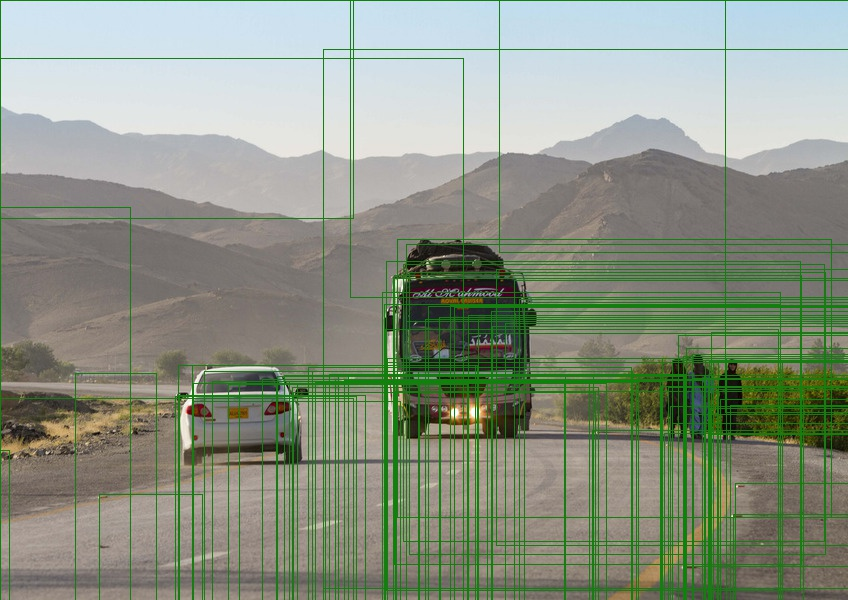

In [ ]:
image_name = "8.jpg"
image_location = "/content/drive/'My Drive'/DLS-2019-Object-Detection/images/"+image_name
%cd /content/drive/'My Drive'/DLS-2019-Object-Detection/detectron
!python tools/infer_rpn.py \
    --im $image_location \
    --rpn-cfg configs/12_2017_baselines/rpn_R-50-C4_1x.yaml \
    --rpn-pkl models/rpn.pkl

from IPython.display import Image
Image("/tmp/"+image_name)

Now, we will see the results of Faster R-CNN. 
Faster R-CNN, takes the region proposals predicted by the RPN and classifies them in the right class. 

/content/drive/My Drive/DLS-2019-Object-Detection/detectron
[E init_intrinsics_check.cc:43] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature avx2 is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature fma is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
Found Detectron ops lib: /usr/local/lib/python3.7/dist-packages/torch/lib/libcaffe2_detectron_ops_gpu.so
WARNING cnn.py:  25: [====DEPRECATE WARNING====]: you are creating an object from CNNModelHelper class which will be deprecated soon. Please use ModelHelper object with brew module. For more information, please refer to caffe2.ai and python/brew.py, python/brew_test.py for more information.
INFO infer_sim

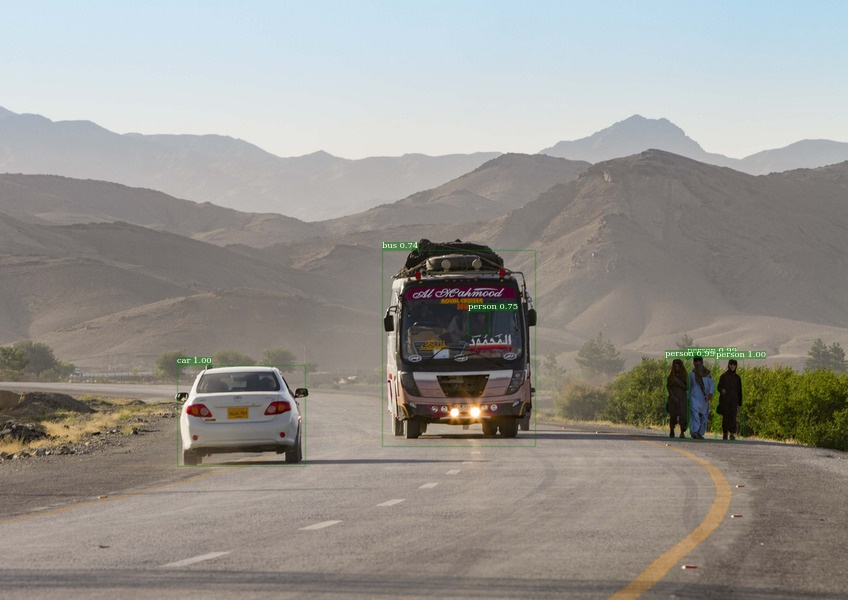

In [ ]:
image_name = "8.jpg"
image_location = "/content/drive/'My Drive'/DLS-2019-Object-Detection/images/"+image_name
%cd /content/drive/'My Drive'/DLS-2019-Object-Detection/detectron

!python tools/infer_simple.py \
    --cfg configs/12_2017_baselines/e2e_faster_rcnn_R-101-FPN_2x.yaml \
    --image-ext jpg \
    --wts models/faster_rcnn.pkl \
$image_location
 
from IPython.display import Image
Image("/tmp/"+image_name)

##YOLO##

Although R-CNNs tend to be very accurate, the biggest problem with the R-CNN family of networks is their speed, they were able to predict at only 5 FPS. This is mainly due to the fact that they have two stages, one for the proposals and the second for the classification.

To help increase the speed of deep learning-based object detectors, both Single Shot Detectors (SSDs) and YOLO use a one-stage detector strategy. In general, single-stage detectors tend to be less accurate than two-stage detectors but are significantly faster.

In this lab, we will take a look to [YOLO](https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/Redmon_You_Only_Look_CVPR_2016_paper.pdf) (You Only Look Once: Unified, Real-Time Object Detection). This algorithm can be used for real-time detection, since it predicts at 45 FPS.

YOLO first divides the input image into grids (let's say 3x3 to make a simpler illustration). And then for each grid, it predicts the bounding boxes and the corresponding class probabilities for objects.

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/12/Screenshot-from-2018-11-15-17-46-32.png" />

The following illustration shows the ground truth representation of each grid. Assuming we divide the image into a grid of size 3x3 and there are 3 classes: Pederastian, Car and Motorcycle, the label *y* of each grid will be an eight dimensional vector.

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/12/Screenshot-from-2018-11-15-18-01-24.png" />

*   pc defines whether an object is present in the grid or not. This value is 1 if the grid contains the midpoint of the object.
*   bx, by, bh, bw specify the bounding box if there is an object. Where bx and by are the x and y coordinates of the midpoint of the object with respect to the current grid.
*   c1, c2, c3 represent the classes. So, if the object is a car, c2 will be 1 and c1 & c3 will be 0.

Even if an object spans out to more than one grid, it will only be assigned to a single grid in which its mid-point is located.

**Anchor Boxes**
As we said before, each grid can only identify one object. But what if there are multiple objects in a single grid? Consider as an example the following image, divided into a 3 X 3 grid:

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/12/Screenshot-from-2018-11-17-13-20-41.png"/>

YOLO assigns an object to a grid if the midpoint of the object is located in this grid. But in the above example, the midpoint of both objects lies in the same grid. To solve this issue, the algorithm pre-defines two different shapes called anchor boxes or anchor box shapes. Now, for each grid, instead of having one output, it will have two outputs. We can always increase the number of anchor boxes as well, I have taken two here to make the concept easy to understand:

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/12/Screenshot-from-2018-11-17-13-36-28.png"/>

The, the *y* label with 2 anchor boxes looks like:

 <img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/12/Screenshot-from-2018-11-17-13-33-31.png"/>

**Intersection over Union**

How can we evaluate the predicted bounding box? Intersection over Union (IoU) computes the intersection over the union between the actual bounding box and the predicted one. Consider the actual (red) and the predicted (blue) bounding boxes for a car as shown below. 

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/12/Screenshot-from-2018-11-16-13-07-50.png" height=300/> <img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/12/Screenshot-from-2018-11-16-13-12-02.png" height=300/>

IoU = Area of the yellow box (Intersection) / Area of the green box (Union)

Then the prediction is good enough if the IoU is greater than a threshold.

Let's create a function to find the IoU of two boxes

In [ ]:
def iou(box1, box2):
  ## box = [x1, y1, x2, y2] where x1, y1 is the top left corner of the box and x2, y2 is the bottom right corner of the box
  
  # determine the (x, y)-coordinates of the intersection rectangle
  xi1 = max(box1[0], box2[0])
  yi1 = max(box1[1], box2[1])
  xi2 = min(box1[2], box2[2])
  yi2 = min(box1[3], box2[3])
  
  # compute the area of intersection rectangle
  inter_area = max(0, yi2 - yi1) * max(0, xi2 - xi1)
  
  box1_area = (box1[3] - box1[1]) * (box1[2] - box1[0])
  box2_area = (box2[3] - box2[1]) * (box2[2] - box2[0])
  
  # compute the intersection over union by taking the intersection area and dividing it by the box1 area + box2 area - the interesection area
  union_area = box1_area + box2_area - inter_area
  
  iou = inter_area / float(union_area)

  return iou

Now, we can see if our function is correct. First, we can try with two identical boxes, the IoU should be 1.

In [ ]:
box1 =[0, 1, 2, 3] # To Complete
box2 = [0, 1, 2, 3]# To Complete
print(iou(box1, box2))

1.0


In the following code, we can find the IoU of two boxes with no intersection. The IoU should be 0.

In [ ]:
box1 = [0,0,1,1]# To Complete
box2 = [1,1,2,2]# To Complete
print(iou(box1, box2))

0.0


And now, if we try with two boxes with some intersection, the IoU should be between 0 and 1

In [ ]:
box1 = [0,0,2,2]# To Complete
box2 = [0,0,1,1]# To Complete
print(iou(box1, box2))

0.25


**Non-Maximum Suppression**

One of the most common problems with object detection algorithms is that rather than detecting an object just once, they might detect it multiple times. Take as an example the image below:

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/12/Screenshot-from-2018-11-16-13-32-40.png" /> 

In the previous image, there are multiple boxes detecting the same car. The Non-Max Suppression technique tries to clean up this prediction to get only a single detection per object. 

It first takes the detection with highest probability. In the above image, it will select the bounding box with 0.9 prediction. Then it will supress the boxes with high IoU with respect to the previoulsy selected one. So, the boxes with 0.6 and 0.7 probabilities will be suppressed in our example.

In the following code, we will create a nms function. But, it is important to modify our previous IoU function. The IoU function created before, finds the IoU between two boxes, but we would like to find the IoU between one box and several others. 

In [ ]:
import numpy as np
def iou(box, boxes):
  ## box = [x1, y1, x2, y2] where x1, y1 is the top left corner of the box and x2, y2 is the bottom right corner of the box
  ## boxes = N x [xn1, yn1, xn2, yn2]
  
  # determine the (x, y)-coordinates of the intersection rectangles
  xi1 = np.maximum(box[0], boxes[:, 0])
  yi1 = np.maximum(box[1], boxes[:, 1])# To Complete
  xi2 = np.minimum(box[2], boxes[:, 2])
  yi2 = np.maximum(box[3], boxes[:, 3])# To Complete
  
  # compute the area of intersection rectangles
  inter_areas = np.maximum(0, yi2 - yi1) * np.maximum(0, xi2 - xi1)
  
  box_area = (box[3] - box[1]) * (box[2] - box[0])# To Complete
  boxes_area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
  
  # compute the intersection over union by taking the intersection area and dividing it by box area + boxes area - interesection areas
  union_areas = box_area + boxes_area - inter_areas # To Complete
  
  iou = inter_areas / union_areas

  return iou

In [ ]:
import numpy as np
 
# Malisiewicz et al.
def nms(boxes, scores, overlapThresh):
  
  # if there are no boxes, return an empty list
  if len(boxes) == 0:
    return []

  # initialize the list of picked indexes	
  pick = []
  
  # Sort the indices by the score
  idxs = np.argsort(scores)

  # keep looping while some indexes still remain in the indexes list
  while len(idxs) > 0:

    # Choose the index with highest score and add the index value to the list of picked indexes
    last = len(idxs) - 1
    i = idxs[last]
    pick.append(i)
    
    # Get the IoU between the box with highest score and the boxes remained in the indexes list
    overlap = iou(boxes[i], boxes[idxs[:last]])

    # delete all indexes from the index list that have overlap > overlapThresh
    idxs = np.delete(idxs, np.concatenate(([last], np.where(overlap > overlapThresh)[0])))

  # return only the indices of the bounding boxes that were picked
  return np.asarray(pick)

Now, we can see the results of YOLO. It takes an input image of shape (608, 608, 3), passes this image to a convolutional neural network (CNN), which returns a (19, 19, 425) dimensional output.

In [ ]:
%cd /content/drive/'My Drive'/DLS-2019-Object-Detection/yolo

from keras.models import load_model
from yolo_utils import preprocess_image, read_classes, read_anchors
import time

# Load pre-trained YOLO model in COCO dataset
yolo_model = load_model("model_data/yolo.h5")

# You can also choose an image from /content/drive/My Drive/DLS-2019-Object-Detection/images
img_path = "test2.jpg"

image, image_data = preprocess_image(img_path, model_image_size = (608, 608))
width_image, height_image = image.size

start_time = time.time()
yolo_outputs = yolo_model.predict(image_data)
yolo_time = time.time() - start_time
print("YOLO Predcition time per image:", yolo_time)
print(yolo_outputs.shape)
try:
  model_times
except NameError:
  model_times = dict()
model_times["YOLO"] = yolo_time


/content/drive/My Drive/DLS-2019-Object-Detection/yolo


/usr/local/lib/python3.7/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


YOLO Predcition time per image: 1.9088122844696045
(1, 19, 19, 425)


In [ ]:
!pip install tensorflow==1.14.0 keras==2.3.1

     |████████████████████████████████| 109.3MB 113kB/s 
     |████████████████████████████████| 378kB 34.2MB/s 
     |████████████████████████████████| 491kB 34.0MB/s 
     |████████████████████████████████| 3.2MB 35.9MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow 2.3.1
    Uninstalling tensorflow-2.3.1:
      Successfully uninstalled tensorflow-2.3.1
  Found existing installation: Keras 1.2.0
    Uninstalling Keras-1.2.0:
      Successfully uninstalled Keras-1.2.0


Here, each cell of a 19 X 19 grid returns 425 numbers

425 = 5 * 85, where 5 is the number of anchor boxes per grid

85 = 5 + 80, where 5 is (pc, bx, by, bh, bw) and 80 is the number of classes we want to detect


<img src="https://raw.githubusercontent.com/enggen/Deep-Learning-Coursera/1407e19c98833d2686a0748db26b594f3102301e/Convolutional%20Neural%20Networks/Week3/Car%20detection%20for%20Autonomous%20Driving/nb_images/flatten.png" /> 



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from yolo_utils import yolo_boxes_to_corners, scale_boxes, yolo_head, generate_colors, draw_boxes

# Get the class names and the anchors
class_names = read_classes("model_data/coco_classes.txt")
anchors = read_anchors("model_data/yolo_anchors.txt")

print("Classes:", class_names)
print("Number of classes:", len(class_names))
print("Number of anchors:", len(anchors))

## Convert final layer features to bounding box parameters
# box_confidence : bc
# box_xy : (bx, by)
# box_wh : (bh, bw)
# box_class_probs : class probability
box_confidence, box_xy, box_wh, box_class_probs = yolo_head(yolo_outputs, anchors, len(class_names))

# Convert YOLO box predictions to bounding box corners
boxes = yolo_boxes_to_corners(box_xy, box_wh)



Classes: ['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
Number of classes: 80
Number of anchors: 5


Now, for each box (of each cell) we will compute the following elementwise product and extract a probability that the box contains a certain class.

<img src="https://raw.githubusercontent.com/enggen/Deep-Learning-Coursera/1407e19c98833d2686a0748db26b594f3102301e/Convolutional%20Neural%20Networks/Week3/Car%20detection%20for%20Autonomous%20Driving/nb_images/probability_extraction.png" /> 



In [ ]:
# As bc defines whether an object is present in the grid or not, we multiply the box confidence by the class probabilty
box_scores = box_confidence *  box_class_probs 

# We obtain the class of each box by choosing the index with highest score among the 80 classes
box_classes = np.argmax(box_scores, -1)

# We obtain the class score of each box by choosing the highest score among the 80 classes
box_class_scores = np.max(box_scores,-1)

Let's filter the predictions, assuming the possitive predictions are the ones with a class score higher than a threshold

In [ ]:
threshold = 0.6
ids_to_filter = box_class_scores > threshold

scores = box_class_scores[ids_to_filter] # Select only the scores higher than 0.6
boxes = boxes[ids_to_filter] # Select only the boxes with score higher than 0.6
classes = box_classes[ids_to_filter] # Select the classes of the boxes with socre higher than 0.6

# Scale the predicted boxes to the size of the original image
boxes = scale_boxes(boxes, (height_image, width_image))

Before using nms, we can see that even after filtering with the threshold, there are some overlapped boxes

car 0.74 (16, 188) (427, 464)
car 0.71 (15, 198) (409, 458)
car 0.82 (333, 200) (561, 383)
car 0.68 (521, 186) (710, 354)
car 0.77 (338, 186) (553, 384)
car 0.87 (331, 187) (563, 382)


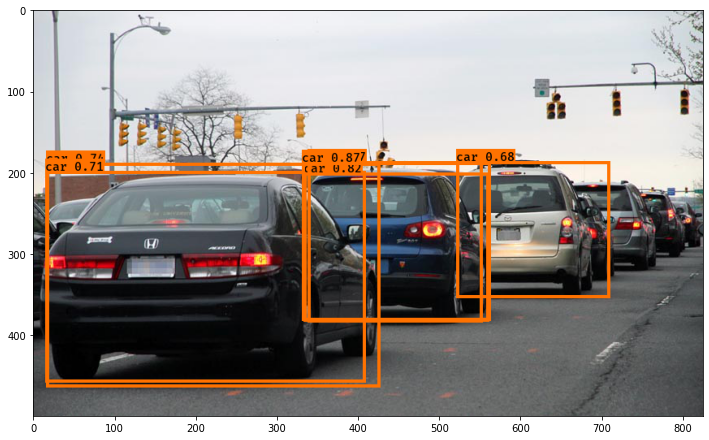

In [ ]:
from PIL import Image
#Generate colors for drawing bounding boxes.
colors = generate_colors(class_names)

# Draw bounding boxes on the image file
image = Image.open(img_path)
draw_boxes(image, scores, boxes, classes, class_names, colors)

plt.figure(figsize=(12,12))
plt.imshow(image)

Number of boxes before NMS: 6
Number of boxes after NMS: 2
car 0.74 (16, 188) (427, 464)
car 0.87 (331, 187) (563, 382)


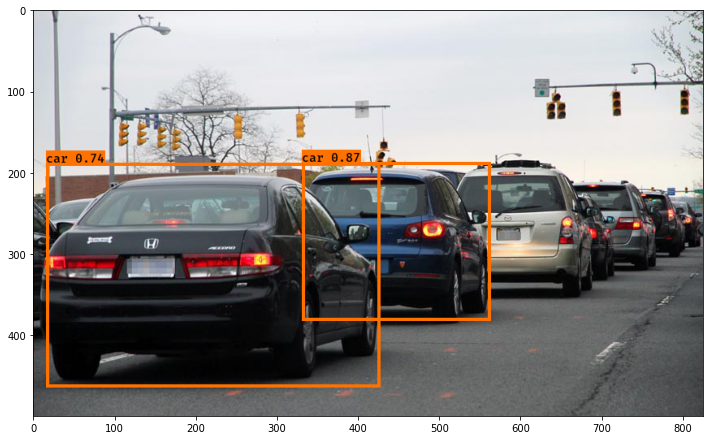

In [ ]:
print("Number of boxes before NMS:", len(boxes))

# Apply NMS to filter overlapping boxes
nms_th = 0.5
ids_nms = nms(boxes, scores, nms_th) # To complete
print("Number of boxes after NMS:", len(ids_nms))

# Choose only the socres, boxes and classes chosen by nms - Hint: Same process as for the threshold
scores = scores[ids_nms]# To complete
boxes = boxes[ids_nms]# To complete
classes = classes[ids_nms]# To complete

# Draw bounding boxes on the image file
image = Image.open(img_path)
draw_boxes(image, scores, boxes, classes, class_names, colors)

plt.figure(figsize=(12,12))
plt.imshow(image)

Here you have the entire code to detect objects with YOLO, you can play with the parameters on different images.

/content/drive/My Drive/DLS-2019-Object-Detection/yolo


/usr/local/lib/python3.7/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


(1, 19, 19, 425)
Classes: ['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
Number of classes: 80
Number of anchors: 5
Number of boxes before NMS: 8
Number of boxes after NMS: 4
person

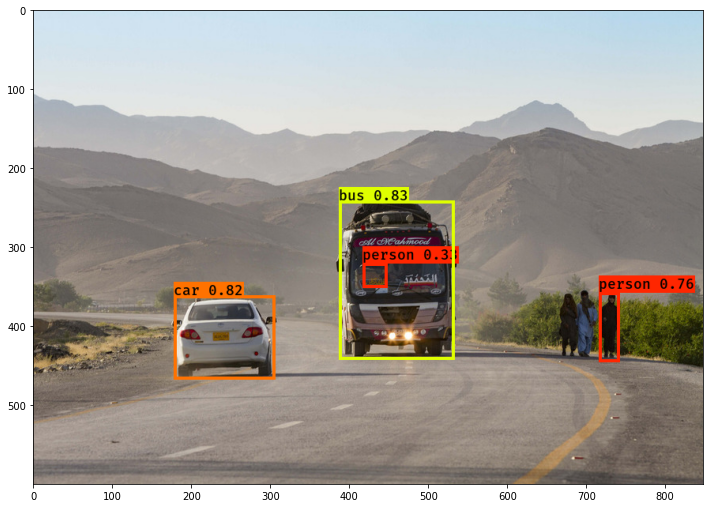

In [ ]:
threshold = 0.3 # To Complete
nms_th = 0.5 # To Complete
img_path = "/content/drive/My Drive/DLS-2019-Object-Detection/images/8.jpg" # To Complete - You can choose images from /content/drive/My Drive/DLS-2019-Object-Detection/images/

%cd /content/drive/'My Drive'/DLS-2019-Object-Detection/yolo

from keras.models import load_model
from yolo_utils import preprocess_image, read_classes, read_anchors, yolo_boxes_to_corners, scale_boxes, yolo_head, generate_colors, draw_boxes
import numpy as np
import matplotlib.pyplot as plt

# Load pre-trained YOLO model in COCO dataset
yolo_model = load_model("model_data/yolo.h5")


image, image_data = preprocess_image(img_path, model_image_size = (608, 608))
width_image, height_image = image.size

yolo_outputs = yolo_model.predict(image_data)
print(yolo_outputs.shape)

# Get the class names and the anchors
class_names = read_classes("model_data/coco_classes.txt")
anchors = read_anchors("model_data/yolo_anchors.txt")
colors = generate_colors(class_names)

print("Classes:", class_names)
print("Number of classes:", len(class_names))
print("Number of anchors:", len(anchors))

## Convert final layer features to bounding box parameters
# box_confidence : bc
# box_xy : (bx, by)
# box_wh : (bh, bw)
# box_class_probs : class probability
box_confidence, box_xy, box_wh, box_class_probs = yolo_head(yolo_outputs, anchors, len(class_names))

# Convert YOLO box predictions to bounding box corners
boxes = yolo_boxes_to_corners(box_xy, box_wh)

# As bc defines whether an object is present in the grid or not, we multiply the box confidence by the class probabilty
box_scores =  box_confidence * box_class_probs

# We obtain the class of each box by choosing the index with highest score among the 80 classes
box_classes = np.argmax(box_scores, -1) 

# We obtain the class score of each box by choosing the highest score among the 80 classes
box_class_scores = np.max(box_scores,-1)

ids_to_filter = box_class_scores > threshold

scores = box_class_scores[ids_to_filter] # Select only the scores higher than 0.6
boxes = boxes[ids_to_filter] # Select only the boxes with score higher than 0.6
classes = box_classes[ids_to_filter] # Select the classes of the boxes with socre higher than 0.6

# Scale the predicted boxes to the size of the original image
boxes = scale_boxes(boxes, (height_image, width_image))

print("Number of boxes before NMS:", len(boxes))

# Apply NMS to filter overlapping boxes
ids_nms = nms(boxes, scores, nms_th)
print("Number of boxes after NMS:", len(ids_nms))

# Choose only the socres, boxes and classes chosen by nms - Hint: Same process as for the threshold
scores =  scores[ids_nms]
boxes =  boxes[ids_nms]
classes =  classes[ids_nms]

# Draw bounding boxes on the image file
image = Image.open(img_path)
draw_boxes(image, scores, boxes, classes, class_names, colors)

plt.figure(figsize=(12,12))
plt.imshow(image)


### Try YOLO on Videos

As mentioned before, YOLO is fast enough to generate predictions in real time. For this reason, we will use YOLO to track elements in a video file.

First, let's create some functions to group the prediction per image.

In [ ]:
import cv2
def preprocess_image_cv2(img, model_image_size):
    resized_image = cv2.resize(img, model_image_size)
    resized_image = resized_image / 255.
    resized_image = np.expand_dims(resized_image, 0)  # Add batch dimension.
    return img, resized_image
  
def post_process_yolo(yolo_outputs):
  
    box_confidence, box_xy, box_wh, box_class_probs = yolo_head(yolo_outputs, anchors, len(class_names))

    # Convert YOLO box predictions to bounding box corners
    boxes = yolo_boxes_to_corners(box_xy, box_wh)

    # As bc defines whether an object is present in the grid or not, we multiply the box confidence by the class probabilty
    box_scores =  box_confidence * box_class_probs

    # We obtain the class of each box by choosing the index with highest score among the 80 classes
    box_classes = np.argmax(box_scores, -1) 

    # We obtain the class score of each box by choosing the highest score among the 80 classes
    box_class_scores = np.max(box_scores,-1)

    ids_to_filter = box_class_scores > threshold

    scores = box_class_scores[ids_to_filter] # Select only the scores higher than 0.6
    boxes = boxes[ids_to_filter] # Select only the boxes with score higher than 0.6
    classes = box_classes[ids_to_filter] # Select the classes of the boxes with socre higher than 0.6

    # Scale the predicted boxes to the size of the original image
    boxes = scale_boxes(boxes, (height_image, width_image))


    # Apply NMS to filter overlapping boxes
    ids_nms = nms(boxes, scores, nms_th)

    # Choose only the socres, boxes and classes chosen by nms - Hint: Same process as for the threshold
    scores =  scores[ids_nms]
    boxes =  boxes[ids_nms]
    classes =  classes[ids_nms]

    # Draw bounding boxes on the image file
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    image = Image.fromarray(img_rgb)
    draw_boxes(image, scores, boxes, classes, class_names, colors, verbose=False)
    
    return image

Due to implementation issues in Colab, we can't see the prediction in real time. 

In [ ]:
import cv2
from tqdm.autonotebook import tqdm, trange


input_video = "/content/drive/My Drive/DLS-2019-Object-Detection/yolo/video_1.mp4"

nms_th = 0.5
threshold = 0.6

flux = cv2.VideoCapture(input_video) # Capture input_video

fps = flux.get(cv2.CAP_PROP_FPS)
frame_count = int(flux.get(cv2.CAP_PROP_FRAME_COUNT))
duration = frame_count/fps
print("Duration of the video:", duration, "seconds")

fourcc = cv2.VideoWriter_fourcc(*'XVID')# FourCC is a 4-byte code used to specify the video codec. The list of available codes can be found in fourcc.org

frame_width = int(flux.get(3))
frame_height = int(flux.get(4))

out = cv2.VideoWriter('output.avi',fourcc, flux.get(cv2.CAP_PROP_FPS), (frame_width,frame_height)) # We should specify the output file name, the FourCC code, number of frames per second (fps) and frame size

pbar = tqdm(total=978)
while True:
  
  ret_val, img = flux.read()
  
  if not ret_val:
    break

  image, image_data = preprocess_image_cv2(img, model_image_size = (608, 608))
  height_image, width_image, channel = image.shape

  yolo_outputs = yolo_model.predict(image_data)

  image = post_process_yolo(yolo_outputs)

  img = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
  
  out.write(img)
  pbar.update(1)
pbar.close()

print("Prediction finished. Results stores in output.avi")

Duration of the video: 39.12 seconds


KeyboardInterrupt: ignored

The predictions are stored into the video file *output.avi*. The following code will download the video to your Drive folder */content/drive/My Drive/DLS-2019-Object-Detection/yolo/* If you open that file, you can take a look of how it would be the prediction in real-time.

In [ ]:
from google.colab import files
files.download('output.avi')



---

#Part II: Instance Segmentation#

In this second part of the lab, we will work on Instance Segmentation. We will see Mask R-CNN, you will see the results of a pre-trained network where you can compare the results of Instance Segmentation and Object Detection. Then you will finetune the network on your own dataset.


## Mask R-CNN

Mask R-CNN ([He et al., 2016](http://openaccess.thecvf.com/content_ICCV_2017/papers/He_Mask_R-CNN_ICCV_2017_paper.pdf)) uses Faster R-CNN to not only detect objects but also to perform pixel-level image segmentation. 

The key point is to decouple the classification and the pixel-level mask prediction tasks. Based on the framework of Faster R-CNN, Mask R-CNN added a third branch for predicting an object mask in parallel with the existing branches for classification and localization. The mask branch is a small network applied to each RoI, predicting a segmentation mask in a pixel-to-pixel manner.

<img src="https://lilianweng.github.io/lil-log/assets/images/mask-rcnn.png" width="600"/>

/content/drive/My Drive/DLS-2019-Object-Detection/detectron
[E init_intrinsics_check.cc:43] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature avx2 is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature fma is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
Found Detectron ops lib: /usr/local/lib/python3.7/dist-packages/torch/lib/libcaffe2_detectron_ops_gpu.so
WARNING cnn.py:  25: [====DEPRECATE WARNING====]: you are creating an object from CNNModelHelper class which will be deprecated soon. Please use ModelHelper object with brew module. For more information, please refer to caffe2.ai and python/brew.py, python/brew_test.py for more information.
INFO infer_sim

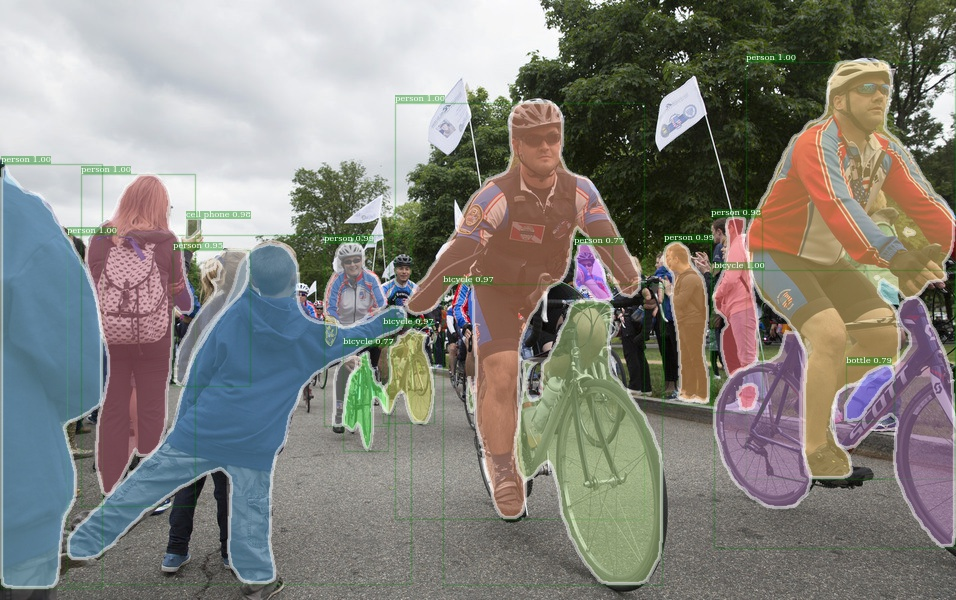

In [ ]:
image_name = "7.jpg"
image_location = "/content/drive/'My Drive'/DLS-2019-Object-Detection/images/"+image_name
%cd /content/drive/'My Drive'/DLS-2019-Object-Detection/detectron
!python tools/infer_simple.py \
    --cfg configs/12_2017_baselines/e2e_mask_rcnn_R-101-FPN_2x.yaml \
    --image-ext jpg \
    --wts models/mask_rcnn.pkl \
$image_location
  
from IPython.display import Image
Image("/tmp/"+image_name)

Now let's train Mask R-CNN with our own dataset. 

To save some time, we will use the dog dataset provided by [RomRoc](https://github.com/RomRoc/maskrcnn_train_tensorflow_colab/blob/master/images.zip) but you can create your own dataset using [VIA (VGG Image Annotator)](http://www.robots.ox.ac.uk/~vgg/software/via/). VIa a single HTML file that you download and open in a browser. Annotating the first few images might be slow, but once you get used to the user interface, it gets faster. 

If you create your own dataset, your data folder should have the following structure:


```
|- "train" directory
    |- jpg image files of training data
  |- "via_region_data.json" annotations file of training data
|- "val" directory
  |- jpg image files of validation data
  |- "via_region_data.json" annotations file of validation data
```

*via_region_data.json* file is generated by VIA tool.

Let's take a look to the images of the dog dataset. You can modify the variable *nb_imgs_to_show* to check more images or you can re-run the following code, each time it choses randomly the images.

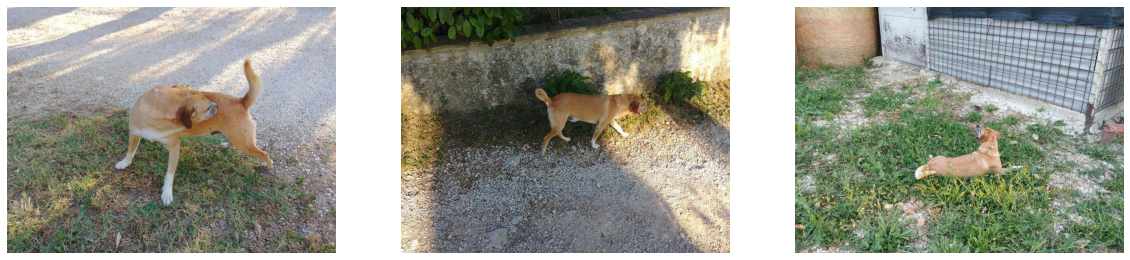

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import glob
from random import shuffle

dataset_path = "/content/drive/My Drive/DLS-2019-Object-Detection/Mask_RCNN/dataset/train/"
images_list = glob.glob(dataset_path + "*.jpg")
shuffle(images_list)

nb_imgs_to_show = 3 # To Complete - Choose the number of images you want to check. From 1 to 50

fig=plt.figure(figsize=(20,50))

for i in range(nb_imgs_to_show):
  
  fig.add_subplot(1, nb_imgs_to_show, i+1)
  plt.imshow(Image.open(images_list[i]))
  plt.axis('off')

plt.show()



With the following code you can see the bounding boxes and the pixel labeling of some images on the training set. 

/content/drive/My Drive/DLS-2019-Object-Detection/Mask_RCNN


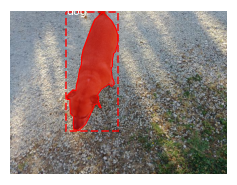

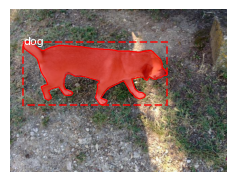

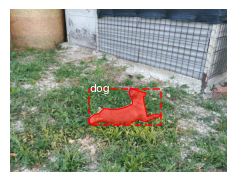

In [ ]:
%cd /content/drive/'My Drive'/DLS-2019-Object-Detection/Mask_RCNN/

import dog
from mrcnn import utils
from mrcnn import visualize

# Load training dataset
dataset = dog.DogDataset()
dataset.load_dog("/content/drive/My Drive/DLS-2019-Object-Detection/Mask_RCNN/dataset/", "train")
dataset.prepare()

nb_imgs_to_show = 3 # To Complete - Choose the number of images you want to check. From 1 to 50
image_ids = dataset.image_ids
shuffle(image_ids)

for image_id in image_ids[:nb_imgs_to_show]:
  image = dataset.load_image(image_id)
  mask, class_ids = dataset.load_mask(image_id)
  bbox = utils.extract_bboxes(mask)
  visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names, figsize=(4, 4))


The Mask R-CNN network that we will use to detect the dog in our images has the following configuration: the pre-trained CNN architecture to extract features is [ResNet101](http://openaccess.thecvf.com/content_cvpr_2016/papers/He_Deep_Residual_Learning_CVPR_2016_paper.pdf), the RPN and the mask branch were trained using [COCO](http://cocodataset.org/) dataset. 

The next command, will finetune the Mask R-CNN network using the images located in the *train* folder. 

In [ ]:
%cd /content/drive/'My Drive'/DLS-2019-Object-Detection/Mask_RCNN
!python dog.py train --dataset=dataset/ --epochs=5 --weights=coco # You can modify the number of epochs

After the training with our own dataset, we will see the results. With the variabla *epoch_to_test* you can choose with which epoch of the training you want to test, like that you can check the quality of the predictions after each epoch of training.

First, let's see how is the prediction after training only for 1 epoch.

In [ ]:
%cd /content/drive/'My Drive'/DLS-2019-Object-Detection/Mask_RCNN

epoch_to_test = 1 ## You can choose the epoch

from mrcnn.visualize import display_images
import mrcnn.model as modellib
import dog
import glob
import tensorflow as tf
from mrcnn import visualize
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

custom_DIR = "/content/drive/My Drive/DLS-2019-Object-Detection/Mask_RCNN/dataset"
MODEL_DIR = "/content/drive/My Drive/DLS-2019-Object-Detection/Mask_RCNN/logs"
custom_WEIGHTS_PATH = sorted(glob.glob("logs/*/mask_rcnn_*.h5"))[epoch_to_test -1]

config = dog.DogConfig()
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()


# Load validation dataset
dataset = dog.DogDataset()
dataset.load_dog(custom_DIR, "val")
dataset.prepare()

with tf.device("/gpu:0"):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)
    
print("Loading weights ", custom_WEIGHTS_PATH)
model.load_weights(custom_WEIGHTS_PATH, by_name=True)

for image_id in dataset.image_ids:
  image = dataset.load_image(image_id)

  # Run object detection
  results = model.detect([image])

  # Display results
  r = results[0]
  visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                              dataset.class_names, r['scores'],
                              title="Predictions", figsize=(5, 10))

Now, let's see how is the prediction after training for 5 epochs.

In [ ]:
%cd /content/drive/'My Drive'/DLS-2019-Object-Detection/Mask_RCNN

epoch_to_test = 5 ## You can choose the epoch

from mrcnn.visualize import display_images
import mrcnn.model as modellib
import dog
import glob
import tensorflow as tf
from mrcnn import visualize
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

custom_DIR = "/content/drive/My Drive/DLS-2019-Object-Detection/Mask_RCNN/dataset"
MODEL_DIR = "/content/drive/My Drive/DLS-2019-Object-Detection/Mask_RCNN/logs"
custom_WEIGHTS_PATH = sorted(glob.glob("logs/*/mask_rcnn_*.h5"))[epoch_to_test -1]

config = dog.DogConfig()
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()

# Load validation dataset
dataset = dog.DogDataset()
dataset.load_dog(custom_DIR, "val")
dataset.prepare()

with tf.device("/gpu:0"):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)
    
print("Loading weights ", custom_WEIGHTS_PATH)
model.load_weights(custom_WEIGHTS_PATH, by_name=True)

for image_id in dataset.image_ids:
  image = dataset.load_image(image_id)

  # Run object detection
  results = model.detect([image])

  # Display results
  r = results[0]
  visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                              dataset.class_names, r['scores'],
                              title="Predictions", figsize=(5, 10))

#Part III: Semantic Segmentation#

Finally, we will work on Segmentic Segmentation. 

Usually CNN architectures are composed by pooling layers to be robust to local image transformations. However, these pooling layers or the convolution striding, reduces the resolution of the image, which is a big problem for segmantic segmentation.

To solve this issue, some approaches like [DeconvNet](https://www.cv-foundation.org/openaccess/content_iccv_2015/papers/Noh_Learning_Deconvolution_Network_ICCV_2015_paper.pdf), [Segnet](https://arxiv.org/pdf/1511.00561.pdf) and [DUC](https://arxiv.org/pdf/1702.08502.pdf) use a Encoder-Decoder approach. In this type of methods the image is followed by several convolution and pooling layers which learn a small representation of the image, and then other group of layers try to recontruct the image with the predicted segmentation, usually applying deconvolution. 

<img src="http://cvlab.postech.ac.kr/research/deconvnet/images/overall.png" width="900" />

## Atrous Convolution

Other approaches like [DilatedNet](https://arxiv.org/pdf/1511.07122.pdf]) or [DeepLab](https://arxiv.org/pdf/1606.00915.pdf) proposed by Google, use ***Atrous Convolution*** (which is also called *Dilated Convolution*). 


<img src="https://cdn-images-1.medium.com/max/800/0*oX5IPr7TlVM2NpEU.gif" width="300"/>
<img src="https://cdn-images-1.medium.com/max/800/0*3cTXIemm0k3Sbask.gif" width="300"/>

The term “Atrous” indeed comes from French “à trous” meaning hole. Thus, it is also called “algorithme à trous” and “hole algorithm”. In regular convolution, the kernel is applied to consecutive values of the input image but in Atrous convolution, there is a stride to choose the values of the input image. The animation on the right shows an example of atrous convolution with stride r=2

These approaches build models based on well-known image classification arquitectures like VGG, and replace some of the normal convolutions with atrous convolutions. This allows us to enlarge the field of view of filters to incorporate larger context and trys to overcome the reduction of resolution.

In the folder */content/drive/My Drive/DLS-2019-Object-Detection/images_segmentation* there are some images with which you can play for the semantic segmentation task but feel free to add more images to this folder. You can modify the variable *image_name* with the image you want to try.

In the following exervises, we will see the results of DilatedNet.

In [ ]:
%cd /content/drive/'My Drive'/DLS-2019-Object-Detection/DilatedNet
from predict import predict
import matplotlib.pyplot as plt
from PIL import Image

image_name = "cat.jpg"
image_location = "/content/drive/My Drive/DLS-2019-Object-Detection/images_segmentation/"+image_name
print(image_location)
prediction = predict(image_location)

fig=plt.figure(figsize=(10,30))

fig.add_subplot(1, 2, 1)
plt.imshow(Image.open(image_location))
plt.axis('off')
fig.add_subplot(1, 2, 2)
plt.imshow(Image.fromarray(prediction))
plt.axis('off')
plt.show()

/content/drive/My Drive/DLS-2019-Object-Detection/DilatedNet
/content/drive/My Drive/DLS-2019-Object-Detection/images_segmentation/cat.jpg


FileNotFoundError: ignored

In these types of models, it's interesting to analyze the output of the different layers. The following image shows the description of the model, like that you can know the name of the layer you want to see in the next lines of code.


<img src="https://drive.google.com/uc?id=1vanCGPWV5pa6WzBJW5kujVRjCpFXnCaP" width="500" />



First, let's see how is the output of the last convolution layer before starting the dilation *conv4_3*.

In [ ]:
%cd /content/drive/'My Drive'/DLS-2019-Object-Detection/DilatedNet
import predict
import matplotlib.pyplot as plt
from PIL import Image

image_name = "cat.jpg"
image_location = "/content/drive/My Drive/DLS-2019-Object-Detection/images_segmentation/"+image_name

layer_name = "conv5"

out = predict.get_output_per_layer(layer_name, image_location)
print("Layer ", layer_name)
print("Number of feature maps: ", out.shape[-1])
print("Size of each feature map: {} x {}".format(out.shape[0], out.shape[1]))

At the end of the execution of the previous code, you can see the number of feature maps and the size, resulting from the layer you chose. In the next lines of code, you can decide which feature maps you can to display, using the variables *init_map* and *end_map*.

In [ ]:
init_map = 10
end_map = 15
feats_map = range(init_map, end_map)
nb_imgs_to_show = len(feats_map)

fig=plt.figure(figsize=(50,100))

for i in range(nb_imgs_to_show):
  
  fig.add_subplot(1, nb_imgs_to_show, i+1)
  plt.imshow(Image.fromarray(out[:,:,feats_map[i]]))
  plt.axis('off')

plt.show()

You can modify the variable *layer_name* for any layer of the model.

In [ ]:
%cd /content/drive/'My Drive'/DLS-2019-Object-Detection/DilatedNet
import predict
import matplotlib.pyplot as plt
from PIL import Image

image_name = "cat.jpg"
image_location = "/content/drive/My Drive/DLS-2019-Object-Detection/images_segmentation/"+image_name

layer_name = "" # To Complete - Choose the layer you want to analyze

out = predict.get_output_per_layer(layer_name, image_location)
print("Layer ", layer_name)
print("Number of feature maps: ", out.shape[-1])
print("Size of each feature map: {} x {}".format(out.shape[0], out.shape[1]))

In [ ]:
init_map =  # To Complete - From which feature map you want to see
end_map = # To Complete -  Until which feature map you want to see
feats_map = range(init_map, end_map)
nb_imgs_to_show = len(feats_map)

fig=plt.figure(figsize=(50,100))

for i in range(nb_imgs_to_show):
  
  fig.add_subplot(1, nb_imgs_to_show, i+1)
  plt.imshow(Image.fromarray(out[:,:,feats_map[i]]))
  plt.axis('off')

plt.show()

In [ ]:
on